<a href="https://colab.research.google.com/github/Siddheshdumre/ML_LAB_Assignments/blob/main/KNN_RoadACcident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd

file_path = "accident.csv"
df = pd.read_csv(file_path)
df.head()



,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


In [25]:
df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)
df["Speed_of_Impact"].fillna(df["Speed_of_Impact"].median(), inplace=True)

binary_features = ["Helmet_Used", "Seatbelt_Used"]

for col in binary_features:
    df[col] = df[col].map({"No": 0, "Yes": 1})

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

df.head()


<ipython-input-25-eb71a5f14558>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)
<ipython-input-25-eb71a5f14558>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,0,27.0,0,0,1
1,69,0,46.0,0,1,1
2,46,1,46.0,1,1,0
3,32,1,117.0,0,1,0
4,60,0,40.0,1,1,0


In [26]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Survived"])
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.525

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.70      0.60        20
           1       0.54      0.35      0.42        20

    accuracy                           0.53        40
   macro avg       0.53      0.52      0.51        40
weighted avg       0.53      0.53      0.51        40


Confusion Matrix:
 [[14  6]
 [13  7]]


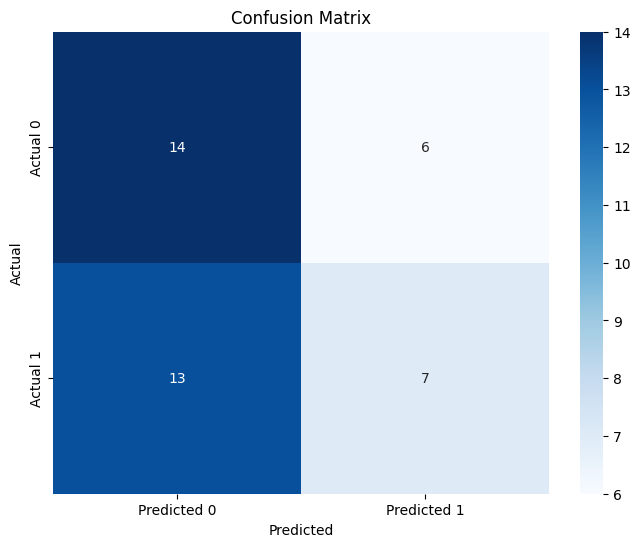

In [29]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt



conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': list(range(1, 21, 2))}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best k value
best_k = grid_search.best_params_['n_neighbors']
print("Best k:", best_k)

# Train with the best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

# Evaluate accuracy
from sklearn.metrics import accuracy_score
print("Optimized KNN Accuracy:", accuracy_score(y_test, y_pred_best))


Best k: 17
Optimized KNN Accuracy: 0.525
